# Setup

In [9]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt


plt.style.use('seaborn')

In [10]:
def plot_results (run_folder: str, xlabel: str, ylabel: str, title: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    
    infected = []
    hospitalised = []
    dead = []
    
    for filename in os.listdir(run_folder_path):
        filename_path = os.path.join(run_folder_path, filename)
        
        match = re.match(r'oneoff_\(\d+\,\s(\d+\.\d+)\)', filename)
        
        if match is None:
            break
        
        rho = float(match.groups()[0])
        
        totals_df = pd.read_csv(os.path.join(filename_path, 'totals.csv'))
        
        infected.append((rho, totals_df.iloc[-1]['Infected']))
        hospitalised.append((rho, totals_df.iloc[-1]['Hospitalised']))
        dead.append((rho, totals_df.iloc[-1]['Dead']))
        
    # Find the point where all lines (approximately) meet
    cross_x = 0
    for i in range(len(infected)):
        if all(map(lambda x: x < 0.025, [infected[i][1], hospitalised[i][1], dead[i][1]])):
            cross_x = infected[i][0]
            break
        
    infected.sort()
    hospitalised.sort()
    dead.sort()
    
    plt.figure(figsize=(7, 4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.plot([x for x, _ in infected], [y for _, y in infected], color='red', label='Infected')
    plt.plot([x for x, _ in hospitalised], [y for _, y in hospitalised], color='green', label='Hospitalised')
    plt.plot([x for x, _ in dead], [y for _, y in dead], color='blue', label='Dead')
    
    plt.axvline(x=cross_x, linestyle='--', color='gray', alpha=0.5, label='Crossing Point')
    plt.text(x=cross_x, y=0.1, s=f'x={cross_x}', fontsize=12, color='gray', alpha=0.75)
    
    plt.xlim(0, 1)
    plt.ylim(-0.025, 1)
    
    plt.legend()
    plt.show()

# Results

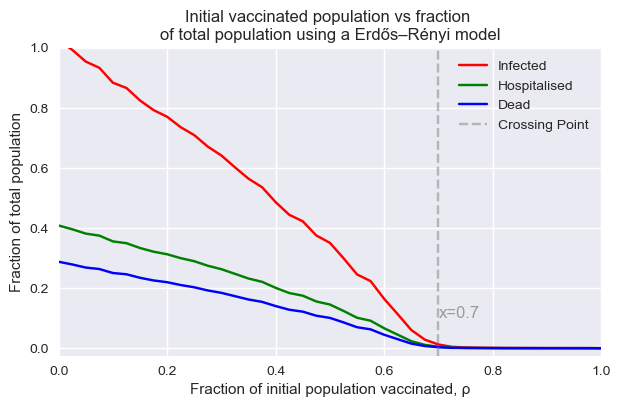

In [11]:
plot_results('section_1a',
             xlabel='Fraction of initial population vaccinated, ρ',
             ylabel='Fraction of total population',
             title='Initial vaccinated population vs fraction \nof total population using a Erdős–Rényi model')

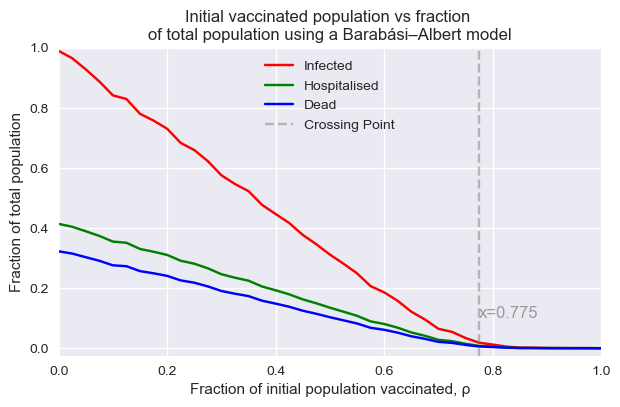

In [12]:
plot_results('section_1b',
             xlabel='Fraction of initial population vaccinated, ρ',
             ylabel='Fraction of total population',
             title='Initial vaccinated population vs fraction \nof total population using a Barabási–Albert model')